In [64]:
# !pip install numpy matplotlib scikit-learn

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [66]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:2000]  # Utiliser un sous-ensemble pour la rapidité
y = mnist.target[:2000].astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]


X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

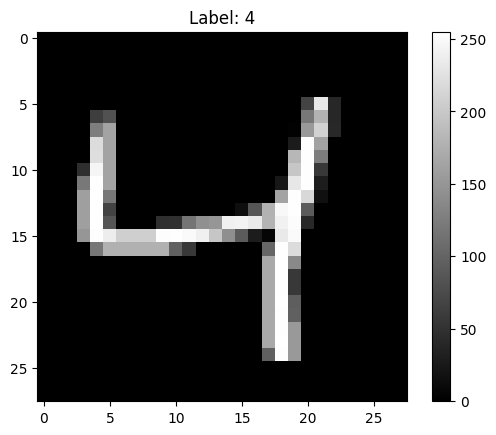

In [67]:
# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()

# Visualize the first image
visualize_image(2, X, y)

In [68]:
# # Normalization of data (mean removal and scaling to unit variance from scratch)
# X = X.astype(np.float64)  # Ensure data is in float format for precise calculations
# mean_vector = X.mean(axis=0)  # Calculate the mean of each feature
# X_centered = X - mean_vector  # Subtract the mean to center the data
# std_vector = X_centered.std(axis=0, ddof=1)  # Calculate the standard deviation of each feature
# X_std = X_centered / std_vector  # Divide by std to scale the data to unit variance
# X_std

In [69]:
# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# # Calculation of the covariance matrix from scratch
# # X_std is already centered and scaled
# n_samples = X_std.shape[0]
# cov_matrix = np.dot(X_std.T, X_std) / (n_samples - 1)  # Covariance matrix computation
# cov_matrix[400]

In [71]:
# Calcul de la matrice de covariance
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix[400]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.55541840e-02, -1.55541840e-02,
       -1.55541840e-02,  7.67663676e-04,  2.61426737e-02,  3.11867898e-02,
        6.30714926e-02,  5.59145570e-02,  5.03999221e-02, -7.59184915e-03,
       -2.22914886e-02, -1.96315038e-02, -1.55541840e-02,  0.00000000e+00,
        0.00000000e+00,  

In [72]:
# Calcul des valeurs propres et des vecteurs propres
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [73]:
# Tri des vecteurs propres par ordre décroissant des valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualisation dimensionnelle

## PCA 2D

In [74]:
# Sélectionner les deux premiers vecteurs propres pour la visualisation
k = 2
projection_matrix = eigenvectors[:, :k]

In [75]:
# Projection des données dans le nouvel espace
X_pca = np.dot(X_std, projection_matrix)

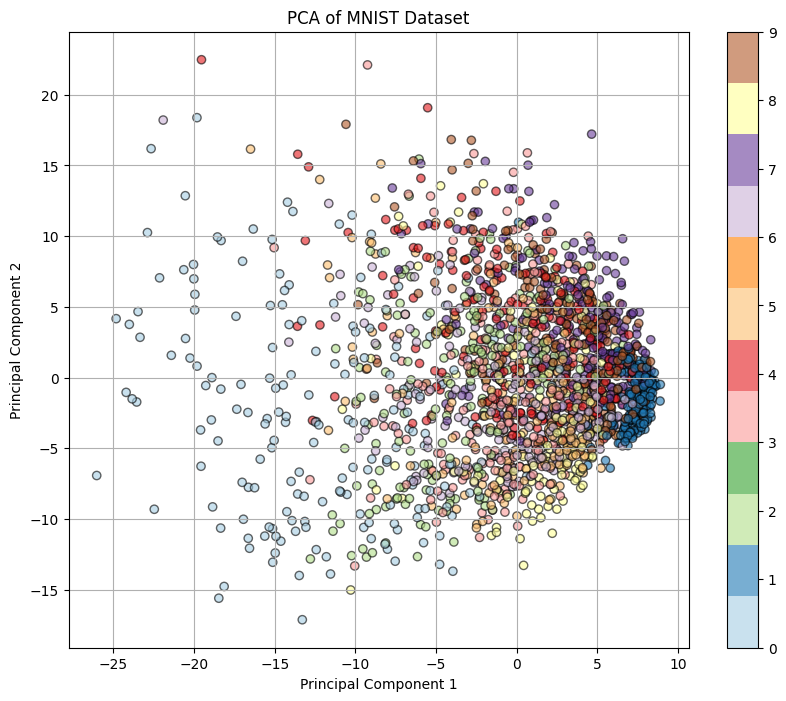

In [76]:
# Visualisation des données réduites
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.grid(True)
plt.show()


## PCA 3D

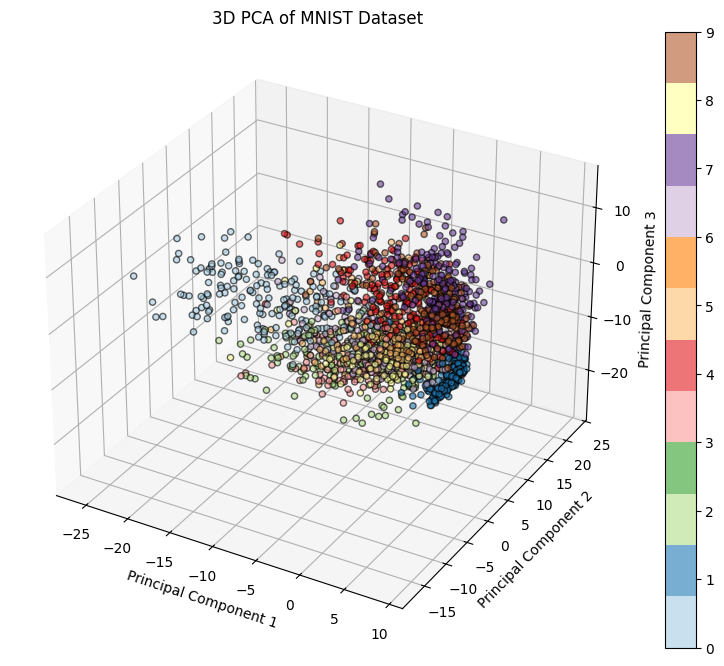

In [77]:


k = 3
projection_matrix3d = eigenvectors[:, :k]

# Project the data onto the top three eigenvectors
X_pca3d = np.dot(X_std, projection_matrix3d)

# 3D Visualization of the PCA-reduced data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3d[:, 0], X_pca3d[:, 1], X_pca3d[:, 2], c=y, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of MNIST Dataset')
plt.show()

# Compression et reconstruction

In [78]:
def pca_n_components(n, X_std):
    
    k = n
    projection_matrix = eigenvectors[:, :k]
    X_pca = np.dot(X_std, projection_matrix)
    X_pca_reconstructed = np.dot(X_pca, projection_matrix.T)
    return X_pca, X_pca_reconstructed



[ 0.4203471  -3.88576917 -0.41550194 -7.36190536 -3.04292152 -0.24942884
  0.07809815 -1.74726998 -0.51955792  3.07640137  2.41225119 -4.7536192
 -3.46878709  3.67965597 -3.04878883 -6.63539596 -8.06923448 -1.33106513
 -1.9930274  -2.14732156  0.44515311  0.88676138  0.85458318  2.53409016
 -1.43435405 -1.35369675 -5.84152702  2.95409103 -1.72300343 -4.84822435
  0.78755367  1.93360126 -1.5663497  -0.64757835  1.50899707 -1.53930764
  0.75961187 -1.16995039  0.67912869 -2.31077372  1.22490971 -1.86611825
  1.4000397   1.0419191  -2.43777844 -0.04069867  0.58065328  1.21647365
 -1.28639057 -0.178103  ]


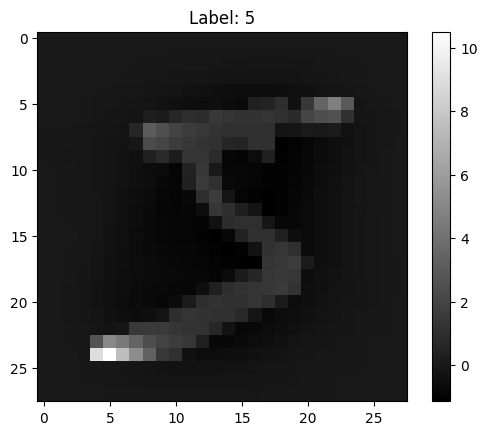

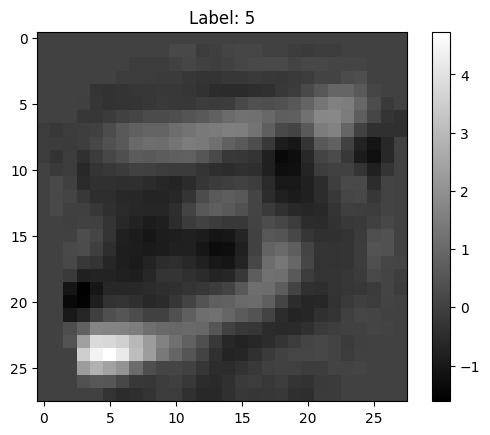

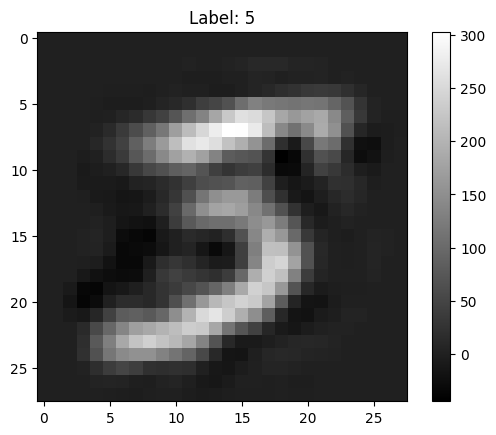

In [87]:
X_pca, X_pca_reconstructed = pca_n_components(50, X_std)
# print(X_pca, X_pca_reconstructed)

print(X_pca[0])

visualize_image(0, X_std, y)
visualize_image(0, X_pca_reconstructed, y)

#denormalize
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)
visualize_image(0, X_pca_reconstructed, y)

In [80]:
type(X_pca)
print(X_pca.shape[1])

784


# Gen Data with PCA

In [81]:
def GenDataWithPCA(n, X_std, number_samples = 1,):
    
    k = n
    projection_matrix = eigenvectors[:, :k]
    X_pca = np.dot(X_std, projection_matrix)
    
    
    
    new_vec = np.zeros((number_samples, n))
    
    for j in range(number_samples):
        for i in range(X_pca.shape[1]):
            new_val = np.random.uniform(min(X_pca[:, i]), max(X_pca[:, i]))
            new_vec[j, i] = new_val
            
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed
    
    

[[-11.48035511   1.07979875]]


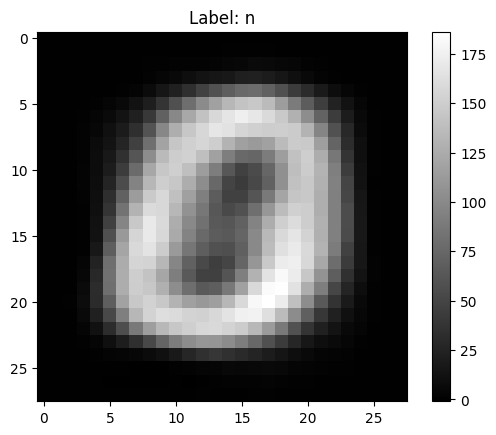

In [88]:
new_vec, X_pca_reconstructed = GenDataWithPCA(2, X_std, 1)

print(new_vec)
# print(X_pca_reconstructed)

X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)


visualize_image(0, X_pca_reconstructed, 'none')

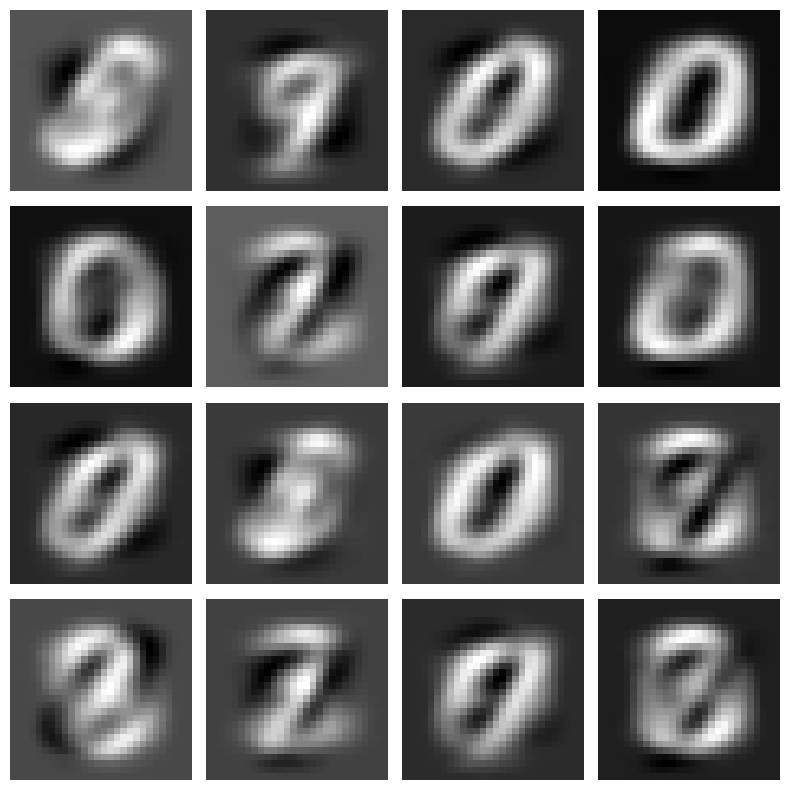

In [83]:
# Modify GenDataWithPCA to generate multiple samples
def GenDataWithPCAmult(n, X_std, number_samples=1):
    k = n
    projection_matrix = eigenvectors[:, :k]
    
    X_pca = np.dot(X_std, projection_matrix)
    
    # Initialize a matrix to store all new PCA vectors
    new_vec = np.zeros((number_samples, k))
    
    for j in range(number_samples):
        for i in range(k):
            # Generate values within the range observed in the original PCA-transformed data
            new_val = np.random.uniform(min(X_pca[:, i]), max(X_pca[:, i]))
            new_vec[j, i] = new_val
            
    # Project back to the original space to get the reconstructed samples
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed

# Modify visualize_image to handle an array of images
def visualize_images(images, labels=None, title="Image", cmap='gray'):
    # Determine how many images and set up subplot dimensions
    num_images = images.shape[0]
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.ravel()
    
    for i in range(num_images):
        if images[i].ndim > 1:
            image_matrix = images[i]
        else:
            image_matrix = images[i].reshape(28, 28)  # Assuming the image is flattened
            
        ax = axes[i]
        ax.imshow(image_matrix, cmap=cmap)
        if labels is not None:
            ax.set_title(f"{title}: {labels[i]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Generate and visualize multiple PCA-reconstructed images
new_vec, X_pca_reconstructed = GenDataWithPCAmult(3, X_std, 16)
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)


visualize_images(X_pca_reconstructed)


# Gen around clusters

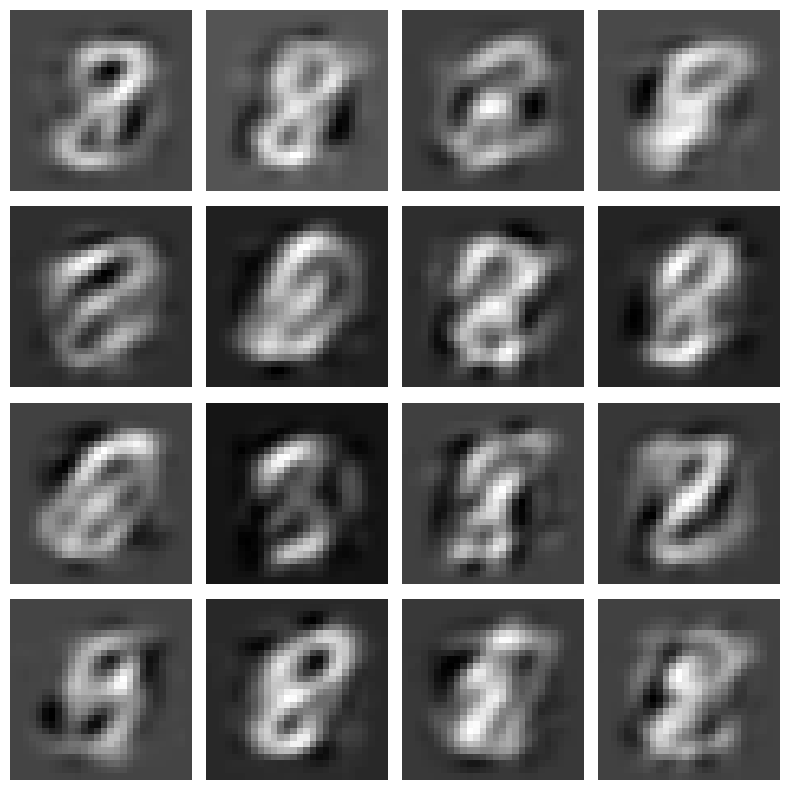

In [89]:
# Modify GenDataWithPCA to generate multiple samples
def GenDataWithPCAmultLabel(k, X_std, label, number_samples=1):
    k = k
    
        
    projection_matrix = eigenvectors[:, :k]
    
    X_pca = np.dot(X_std, projection_matrix)
    
    
    label = [label]
    
    
    
    mask = np.array([l in label for l in y])
    X_pca_label = X_pca[mask]
    

    

    

    
    # Initialize a matrix to store all new PCA vectors
    new_vec = np.zeros((number_samples, k))
    
    for j in range(number_samples):
        for i in range(k):
            # Generate values within the range observed in the original PCA-transformed data
            # new_val = np.random.uniform(min(X_pca_label[:, i]), max(X_pca_label[:, i]))
            new_val = np.random.normal(np.mean(X_pca_label[:, i]), np.std(X_pca_label[:, i])) #changed line wouhou
            new_vec[j, i] = new_val
            
    # Project back to the original space to get the reconstructed samples
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed

# Modify visualize_image to handle an array of images
def visualize_images(images, labels=None, title="Image", cmap='gray'):
    # Determine how many images and set up subplot dimensions
    num_images = images.shape[0]
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.ravel()
    
    for i in range(num_images):
        if images[i].ndim > 1:
            image_matrix = images[i]
        else:
            image_matrix = images[i].reshape(28, 28)  # Assuming the image is flattened
            
        ax = axes[i]
        ax.imshow(image_matrix, cmap=cmap)
        if labels is not None:
            ax.set_title(f"{title}: {labels[i]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Generate and visualize multiple PCA-reconstructed images
new_vec, X_pca_reconstructed = GenDataWithPCAmultLabel(42, X_std, 8, 16)


#denormalize
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)


visualize_images(X_pca_reconstructed)
